#custom tools using langgraph

In [14]:
from langchain_groq import ChatGroq
from langgraph.graph import START,StateGraph,END
from typing import Annotated
from typing import TypedDict
from IPython.display import display,Image
from langgraph.graph.message import add_messages
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode,tools_condition
from langchain_community.tools import tool

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
llm=ChatGroq(model="gemma2-9b-it")

In [6]:
llm.invoke("what is gen ai")

AIMessage(content="**Generative AI** (Gen AI) is a type of artificial intelligence that focuses on creating new content, rather than simply analyzing or classifying existing data. \n\nHere's a breakdown:\n\n**What it does:**\n\n* **Generates text:** Writes stories, poems, articles, code, dialogue, and more.\n* **Creates images:**  Produces photographs, illustrations, artwork, and even 3D models.\n* **Composes music:** Generates melodies, harmonies, and entire musical pieces in various styles.\n* **Synthesizes audio:** Creates realistic speech, sound effects, and voiceovers.\n* **Translates languages:**  Converts text from one language to another.\n\n**How it works:**\n\nGen AI models are typically trained on massive datasets of existing content. They learn the patterns and structures within this data, allowing them to generate new content that resembles the training material. \n\nPopular techniques used in Gen AI include:\n\n* **Generative Adversarial Networks (GANs):**  Two neural net

In [8]:
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [10]:
@tool
def search(query:str):
    """perform web search"""
    search=TavilySearchResults()
    response=search.invoke(query)
    return response

In [11]:
search.invoke("who is current indian team captain")

[{'url': 'https://www.zupee.com/blog/who-is-the-captain-of-indian-cricket-team/',
  'content': 'Home » Games » Cricket » Captains of the Indian Cricket Team: Complete List of All-Time Leaders Find the list of Indian Captains of one-day cricket teams, test matches, and T20 series, in this article. Indian Cricket Team Captain: ODI Match Here is the list of all the Indian Women’s cricket team captains for the test series (2004-2023): Indian Cricket Team Captain: ODI Match Here is the list of all the Indian Women’s cricket team captains for the ODI matches (1976-2023): She was also the former Indian women’s test cricket team captain. Rohit Sharma is the current captain of the Indian men’s cricket team for the Test series, ODI, and T20I. Who was the first captain of the Indian cricket team post-independence?'},
 {'url': 'https://en.wikipedia.org/wiki/List_of_India_national_cricket_captains',
  'content': "Mithali Raj captained India in the first WT20I on 5 August 2006 against England at Der

In [12]:
@tool
def multiply(first_number:int,second_number:int)->int:
    """perform the multiply operation"""
    return first_number * second_number

In [13]:
multiply.invoke({"first_number":22,"second_number":22})

484

In [15]:
tools=[search,multiply]

In [16]:
model_with_bind=llm.bind_tools(tools=tools)

In [17]:
tool_node=ToolNode(tools=tools)

In [18]:
class AgentState(TypedDict):
    messages:Annotated[list,add_messages]

In [19]:
def ai_assisstance(state:AgentState):
    messages=state["messages"]
    response=model_with_bind.invoke(messages)
    return {"messages":[response]}

In [20]:
graph=StateGraph(AgentState)

In [21]:
graph.add_node("llm",ai_assisstance)
graph.add_node("tools",tool_node)
graph.set_entry_point("llm")

In [22]:
graph.add_conditional_edges(
    "llm",
    tools_condition
)

graph.add_edge("tools","llm")

In [23]:
graph.set_finish_point("llm")

In [24]:
app=graph.compile()

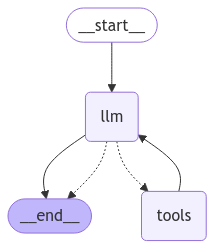

In [25]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except  Exception as e:
    print(e)

In [27]:
app.invoke({"messages":["what is transformer"]})

{'messages': [HumanMessage(content='what is transformer', additional_kwargs={}, response_metadata={}, id='07b8ff07-a486-4b0a-b271-eff50081e908'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s716', 'function': {'arguments': '{"query":"transformer"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 1066, 'total_tokens': 1146, 'completion_time': 0.145454545, 'prompt_time': 0.034148453, 'queue_time': 0.023625946999999994, 'total_time': 0.179602998}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-34f29963-82e4-4e71-bac3-4392548b6eb0-0', tool_calls=[{'name': 'search', 'args': {'query': 'transformer'}, 'id': 'call_s716', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1066, 'output_tokens': 80, 'total_tokens': 1146}),
  ToolMessage(content='[{"url": "https://www.electricaltechnology.org/2012/02/working-principl

In [28]:
app.invoke({"messages":["what is the multiplication of 28 and 7"]})

{'messages': [HumanMessage(content='what is the multiplication of 28 and 7', additional_kwargs={}, response_metadata={}, id='f53576cc-c670-412e-be2f-10173c74b397'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qq8w', 'function': {'arguments': '{"first_number":28,"second_number":7}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1074, 'total_tokens': 1165, 'completion_time': 0.165454545, 'prompt_time': 0.034399113, 'queue_time': 0.022193922999999997, 'total_time': 0.199853658}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-513a6a9b-2a74-4d75-90db-97dc1d419ee5-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 28, 'second_number': 7}, 'id': 'call_qq8w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1074, 'output_tokens': 91, 'total_tokens': 1165}),
  ToolMessage(content='196', name='multip